<a href="https://colab.research.google.com/github/hajri94/research-project/blob/main/Test_Model_building_without_calendar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile


In [ ]:
# We download the excel file
from google.colab import files
uploaded = files.upload()

Saving Test dataframe 10259.xlsx to Test dataframe 10259.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
df = pd.read_excel(io.BytesIO(uploaded['Test dataframe 10259.xlsx']))
# We round the columns (POWER , Temperature, Irradiation.flux) to one decimal place.
df['Temperature']=df['Temperature'].round(1)
df['Irradiation.flux']=df['Irradiation.flux'].round(1)





In [ ]:
# We create multiple POWER lagged columns (we choose 12 lagged dependent variables  ) 
lagged1 = pd.concat([df['POWER'].shift(lag).rename('{}_lag{}'.format(df['POWER'].name, lag)) for lag in range(13)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L1=lagged1.dropna().astype(float)





In [ ]:
# We create multiple Temperature lagged columns (we choose 24 lagged independent variables)
lagged2 = pd.concat([df['Temperature'].shift(lag).rename('{}_lag{}'.format(df['Temperature'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L2=lagged2.dropna().astype(float)


In [ ]:
# We create multiple Irradiation.flux lagged columns(we choose 24 lagged independent variables)
lagged3 = pd.concat([df['Irradiation.flux'].shift(lag).rename('{}_lag{}'.format(df['Irradiation.flux'].name, lag)) for lag in range(25)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L3=lagged3.dropna().astype(float)



In [ ]:
# Maximize the size of Column in google colab 
#(we resize the maximum number of columns in google colab to fit our dataframe)
from google.colab.data_table import DataTable
DataTable.max_columns = 300
# Joining the DataFrame of POWER Lagged Columns to the Dataframe of Temperature Lagged Columns 
# We use the concat function to join 2 dataframes lagged1 (POWER) + lagged2 (Temperature) => Creation of new dataframe called "result".
result = pd.concat([L1,L2], axis=1, join='inner')


In [ ]:
#Joining the DataFrame of POWER and Temperature Lagged Columns (POWER+Temperature=> result dataframe) to the Dataframe of Irradiation flux Lagged Columns 
# We use the concat function to join 2 dataframes result (POWER+Temperature) + lagged3 (Irradiation flux)  => Creation of new dataframe called "result1"
result1 = pd.concat([result,L3], axis=1, join='inner')


In [ ]:
# We join the "Result1" Dataframe (Power , Temperature, Irradiation flux ) to the original dataframe (the one that we have uploaded from excel)
# we perform this line of code in order to link the two columns (READ_DATE),(Week_Day) to the datframe (result2). 
# The new dataframe need to be more organized as we see some columns that are repeated. 
result2 = pd.concat([result1,df], axis=1, join='inner')
#we remove the columns titled (POWER , Temperature, Irradiation flux)
dk=result2.drop(['POWER', 'Temperature','Irradiation.flux'], axis = 1) 
# To move the Read_Date and Week Date columns to first Position we implement some initial step: 
# First we remove the targeted column "Week_Day" from its intial position in the dataframe.  
first_column = dk.pop('Week_Day')
# Second we insert the removed column "Week_Day" to first position.
dk.insert(0, 'Week_Day', first_column)
# We perform the previous step for the "READ_DATE" column.
second_column = dk.pop('READ_DATE')
dk.insert(0, 'READ_DATE', second_column)


,READ_DATE,Week_Day,POWER_lag0,POWER_lag1,POWER_lag2,POWER_lag3,POWER_lag4,POWER_lag5,POWER_lag6,POWER_lag7,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
24,2019-01-02 00:00:00,WED,17.70,16.3,17.8,20.5,18.9,17.0,18.29,21.80,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2,4.2
25,2019-01-02 01:00:00,WED,16.50,17.7,16.3,17.8,20.5,18.9,17.00,18.29,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1,4.2
26,2019-01-02 02:00:00,WED,16.80,16.5,17.7,16.3,17.8,20.5,18.90,17.00,...,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0,4.1
27,2019-01-02 03:00:00,WED,17.00,16.8,16.5,17.7,16.3,17.8,20.50,18.90,...,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9,4.0
28,2019-01-02 04:00:00,WED,17.24,17.0,16.8,16.5,17.7,16.3,17.80,20.50,...,43.2,40.0,28.4,22.7,8.8,4.7,4.4,4.7,5.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,TUE,18.10,18.7,21.3,19.6,16.6,17.7,15.61,16.80,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,2019-12-31 20:00:00,TUE,17.90,18.1,18.7,21.3,19.6,16.6,17.70,15.61,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,2019-12-31 21:00:00,TUE,22.40,17.9,18.1,18.7,21.3,19.6,16.60,17.70,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,2019-12-31 22:00:00,TUE,17.50,22.4,17.9,18.1,18.7,21.3,19.60,16.60,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [ ]:
# We drop the nan value from the dataframe
r3=dk.dropna()
# we extract the Hour of the day date from the READ_DATE column and add it as new column (because we will need it later for modelling purpose)
r3['Hour_day'] = pd.DatetimeIndex(r3['READ_DATE']).hour
#we move the postion of  "Hour_date" column to first position. 
column1 = r3.pop('Hour_day')
r3.insert(0, 'Hour_day', column1)
# we extract the month date from the READ_DATE column and add it as new column (because we will need it later for modelling purpose)
r3['month'] = pd.DatetimeIndex(r3['READ_DATE']).month
#we move the postion of  "month" column to first position. 
column2 = r3.pop('month')
r3.insert(0, 'month', column2)
#We move the read_date column to first position 
column3 = r3.pop('READ_DATE')
r3.insert(0, 'READ_DATE', column3)












In [ ]:
# With this code we can perform the filtering of each of the "Hour_day" value.  
HourWeek=r3[r3['Hour_day']== 1]



In [ ]:
# after building the first part of the model called ARX model (Autoregressive with exogenous modelling), we perform the model fitting process.
#We begin with:  
#Separation of indeppendent variables and dependent variables

import pandas as pd
import statsmodels.api as sm
X = r3[['POWER_lag1','POWER_lag2','POWER_lag3','POWER_lag4','POWER_lag5','POWER_lag6','POWER_lag7','POWER_lag8','POWER_lag9','POWER_lag10','POWER_lag11','POWER_lag12',
        'Temperature_lag0','Temperature_lag1','Temperature_lag2','Temperature_lag3','Temperature_lag4','Temperature_lag5','Temperature_lag6','Temperature_lag7','Temperature_lag8',
        'Temperature_lag9','Temperature_lag10','Temperature_lag11','Temperature_lag12','Temperature_lag13','Temperature_lag14','Temperature_lag15','Temperature_lag16','Temperature_lag17','Temperature_lag18','Temperature_lag19','Temperature_lag20','Temperature_lag21','Temperature_lag22','Temperature_lag23','Temperature_lag24',
        'Irradiation.flux_lag0','Irradiation.flux_lag1','Irradiation.flux_lag2','Irradiation.flux_lag3','Irradiation.flux_lag4','Irradiation.flux_lag5','Irradiation.flux_lag6','Irradiation.flux_lag7','Irradiation.flux_lag8','Irradiation.flux_lag9','Irradiation.flux_lag10','Irradiation.flux_lag11','Irradiation.flux_lag12','Irradiation.flux_lag13','Irradiation.flux_lag14','Irradiation.flux_lag15','Irradiation.flux_lag16','Irradiation.flux_lag17','Irradiation.flux_lag18','Irradiation.flux_lag19','Irradiation.flux_lag20','Irradiation.flux_lag21','Irradiation.flux_lag22','Irradiation.flux_lag23',
        'Irradiation.flux_lag24']] 
Y = r3['POWER_lag0']



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# we fit our model using statmodels library 
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
regr = linear_model.LinearRegression()
regr.fit(X, Y)


LinearRegression()

In [ ]:
# with statsmodels we display a comprehensive table with statistical informations.
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             POWER_lag0   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2074.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:13:20   Log-Likelihood:                -17978.
No. Observations:                8404   AIC:                         3.608e+04
Df Residuals:                    8341   BIC:                         3.652e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
F=r3.rename(columns={'Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24'})

KJB = smf.ols('POWER_lag0 ~ POWER_lag1 + POWER_lag2 + POWER_lag3 + POWER_lag4 + POWER_lag5 + POWER_lag6 + POWER_lag7 + POWER_lag8 + POWER_lag9 + POWER_lag10 + POWER_lag11 + POWER_lag12 + Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Temperature_lag5 + Temperature_lag6 + Temperature_lag7 + Temperature_lag8 + Temperature_lag9 + Temperature_lag10 + Temperature_lag11 + Temperature_lag12 + Temperature_lag13 + Temperature_lag14 + Temperature_lag15 + Temperature_lag16 + Temperature_lag17 + Temperature_lag18 + Temperature_lag19 + Temperature_lag20 + Temperature_lag21 + Temperature_lag22 + Temperature_lag23 + Temperature_lag24 + Irradiation_flux_lag0 + Irradiation_flux_lag1 + Irradiation_flux_lag2 + Irradiation_flux_lag3 + Irradiation_flux_lag4 + Irradiation_flux_lag5 + Irradiation_flux_lag6 + Irradiation_flux_lag7 + Irradiation_flux_lag8 + Irradiation_flux_lag9 + Irradiation_flux_lag10 + Irradiation_flux_lag11 + Irradiation_flux_lag12 + Irradiation_flux_lag13 + Irradiation_flux_lag14 + Irradiation_flux_lag15 + Irradiation_flux_lag16 + Irradiation_flux_lag17 + Irradiation_flux_lag18 + Irradiation_flux_lag19 + Irradiation_flux_lag20 + Irradiation_flux_lag21 + Irradiation_flux_lag22 + Irradiation_flux_lag23 + Irradiation_flux_lag24',F).fit()
F['yhat'] = KJB.fittedvalues
F['resid'] = KJB.resid
F['predicted'] = KJB.predict(F)
F.loc[:,'predicted'] =  KJB.predict(F)
F




In [ ]:
# We add one column with cumulative sum of the predicted value (our model )and another column for the dataset . 
F['CUMSUM_predicted'] = F['predicted'].cumsum()
F['CUMSUM_POWER_lag0'] = F['POWER_lag0'].cumsum()
# We add another column with cumlative sum for the residual value 
F['CUMSUM_resid'] = F['resid'].cumsum()
F


,READ_DATE,month,Hour_day,Week_Day,POWER_lag0,POWER_lag1,POWER_lag2,POWER_lag3,POWER_lag4,POWER_lag5,...,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,yhat,resid,predicted,CUMSUM_predicted,CUMSUM_POWER_lag0,CUMSUM_resid
24,2019-01-02 00:00:00,1,0,WED,17.70,16.3,17.8,20.5,18.9,17.0,...,4.0,4.1,4.2,4.2,17.686184,0.013816,17.686184,17.686184,17.70,1.381588e-02
25,2019-01-02 01:00:00,1,1,WED,16.50,17.7,16.3,17.8,20.5,18.9,...,4.9,4.0,4.1,4.2,17.431293,-0.931293,17.431293,35.117477,34.20,-9.174773e-01
26,2019-01-02 02:00:00,1,2,WED,16.80,16.5,17.7,16.3,17.8,20.5,...,5.1,4.9,4.0,4.1,16.957886,-0.157886,16.957886,52.075363,51.00,-1.075363e+00
27,2019-01-02 03:00:00,1,3,WED,17.00,16.8,16.5,17.7,16.3,17.8,...,4.7,5.1,4.9,4.0,17.336679,-0.336679,17.336679,69.412043,68.00,-1.412043e+00
28,2019-01-02 04:00:00,1,4,WED,17.24,17.0,16.8,16.5,17.7,16.3,...,4.4,4.7,5.1,4.9,17.657773,-0.417773,17.657773,87.069815,85.24,-1.829815e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,12,19,TUE,18.10,18.7,21.3,19.6,16.6,17.7,...,4.4,5.2,4.8,4.6,19.135655,-1.035655,19.135655,101877.440415,101875.66,-1.780415e+00
8756,2019-12-31 20:00:00,12,20,TUE,17.90,18.1,18.7,21.3,19.6,16.6,...,3.6,4.4,5.2,4.8,19.242839,-1.342839,19.242839,101896.683254,101893.56,-3.123254e+00
8757,2019-12-31 21:00:00,12,21,TUE,22.40,17.9,18.1,18.7,21.3,19.6,...,4.4,3.6,4.4,5.2,19.291897,3.108103,19.291897,101915.975151,101915.96,-1.515105e-02
8758,2019-12-31 22:00:00,12,22,TUE,17.50,22.4,17.9,18.1,18.7,21.3,...,3.4,4.4,3.6,4.4,20.629640,-3.129640,20.629640,101936.604791,101933.46,-3.144791e+00


In [ ]:
#We evaluate the regression model using the mean absolute error metric 
#We import the mean_absolute_error from the module sklearn.metrics of sklearn library.
from sklearn.metrics import mean_absolute_error as mae
# we calculate  mean absolute error (MAE) 
error = mae(F['POWER_lag0'], F['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))

Mean absolute error : 1.5244652799414609


In [ ]:
# We evaluate the regression model for the winter season months.
# We extract the winter season months from the trained model in order to calculate the R squared value and the mean absolute error (MAE)
F_Winter=F[(F['month']== 11)|(F['month']== 12) |(F['month']== 1)|(F['month']== 2)|(F['month']== 3)]        
# we calculate  mean absolute error (MAE) 
from sklearn.metrics import mean_absolute_error as mae
error = mae(F_Winter['POWER_lag0'], F_Winter['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))
# in order to calculate the R squared we import the r2_score from the module sklearn.metrics of sklearn library.
from sklearn.metrics import r2_score
r2 = r2_score(F_Winter['POWER_lag0'], F_Winter['predicted'])
# We print the value
print('r2 score  is', r2)

Mean absolute error : 1.5915129718603738
r2 score  is 0.8284856365518936


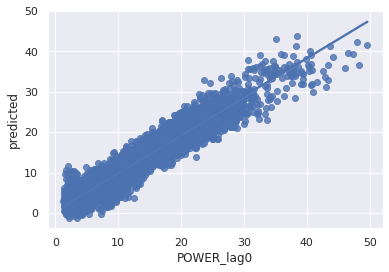

In [ ]:
# Model quality plot (Q-Q plot) X : dataset , Y : Predictive data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=F)

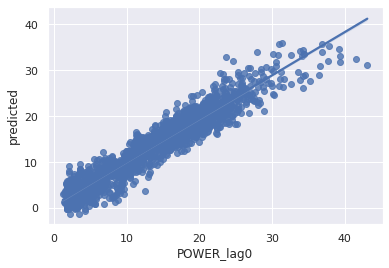

In [ ]:
# Weekend plot (Q-Q plot) X : dataset , Y : Predictive data
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekend)

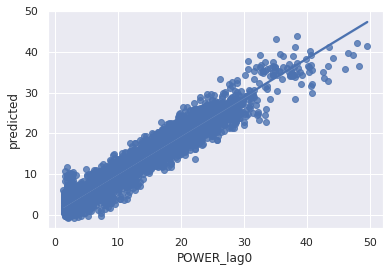

In [ ]:
# Weekday plot (Q-Q plot) X : dataset , Y : Predictive data
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data=Weekday)

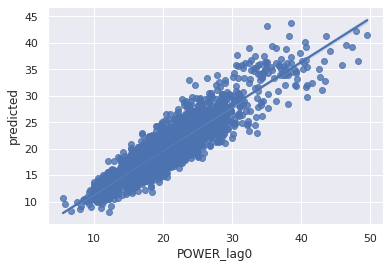

In [ ]:
# Monthly plot (NOV to March) (Q-Q plot) X : dataset , Y : Predictive data: 
NOVtoMARCH = F[(F["month"]== 1)| (F["month"]== 2)|(F["month"]== 3)|(F["month"]== 11)|(F["month"]== 12)]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="predicted", data= NOVtoMARCH)

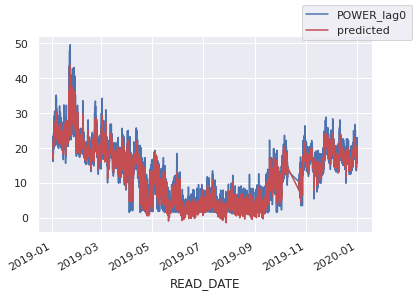

In [ ]:
 # line chart  for the full year  T : month , Y  dataset  and predicted data
import matplotlib.pyplot as plt
ax = F.plot(x="READ_DATE", y="POWER_lag0", legend=False)
F.plot(x="READ_DATE", y="predicted", ax=ax, legend=False, color="r")
ax.figure.legend()
plt.show()







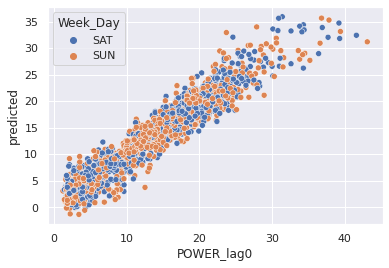

In [ ]:
#(Q-Q plot) for the weekend     T :Dataset   , Y : predicted  
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.scatterplot(data=Weekend, x="POWER_lag0", y="predicted", hue="Week_Day", palette="deep")


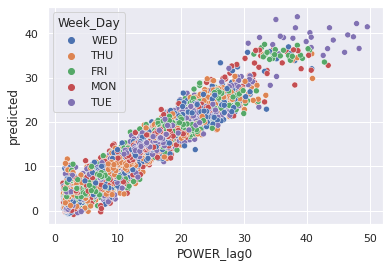

In [ ]:
#(Q-Q plot) for the weekday    T :Dataset   , Y : predicted  
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.scatterplot(data=Weekday, x="POWER_lag0", y="predicted", hue="Week_Day", palette="deep")




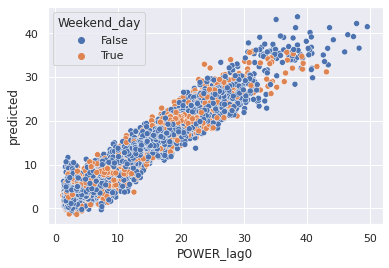

In [ ]:
##(Q-Q plot) for the weekend and weekday    T :Dataset   , Y : predicted  
# We add a column called DayOfWeek in which it contain days of the week extracted from the READ_DATE column ( the values are numerical 0 : monday ... 6 :sunday ) 
F["DayOfWeek"] = F["READ_DATE"].dt.weekday
# A boolean condition is used in order to create the Weekend_day column . 
F["Weekend_day"] = F["DayOfWeek"] >= 5
#(Q-Q plot) for the weekend and weekday    T :Dataset   , Y : predicted   
sns.scatterplot(data=F, x="POWER_lag0", y="predicted", hue="Weekend_day", palette="deep")

In [ ]:
#(Q-Q plot) for the morning hours VS afternoon hours VS night hours from     T :Dataset   , Y : predicted







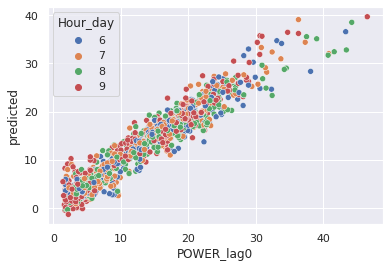

In [ ]:
#(Q-Q plot) for the morning hours from     T :Dataset   , Y : predicted 
Morning_hours= F[(F["Hour_day"]== 6)| (F["Hour_day"]== 7)|(F["Hour_day"]== 8)|(F["Hour_day"]== 9)]
sns.scatterplot(data=Morning_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")

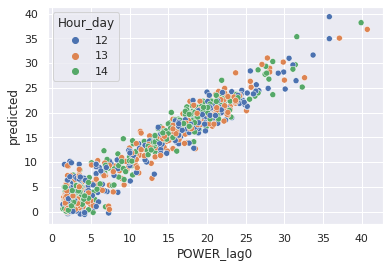

In [ ]:
#(Q-Q plot) for the afternoon hours from     T :Dataset   , Y : predicted 
afternoon_hours= F[(F["Hour_day"]== 12)| (F["Hour_day"]== 13)|(F["Hour_day"]== 14)]
sns.scatterplot(data=afternoon_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")

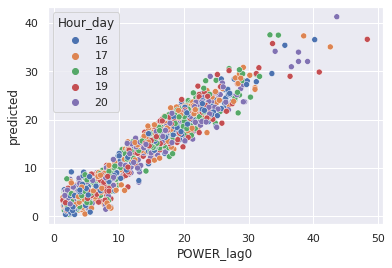

In [ ]:
#(Q-Q plot) for the night hours from     T :Dataset   , Y : predicted 
night_hours= F[(F["Hour_day"]== 16)| (F["Hour_day"]== 17)|(F["Hour_day"]== 18)|(F["Hour_day"]== 19)|(F["Hour_day"]== 20)]
sns.scatterplot(data=night_hours, x="POWER_lag0", y="predicted", hue="Hour_day", palette="deep")

(-20.0, 20.0)

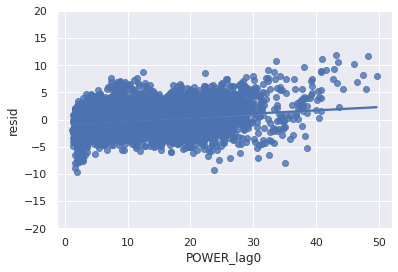

In [ ]:
# Residual and Q plot(dataset) 
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=F)
plt.ylim(-20, 20)

(-20.0, 20.0)

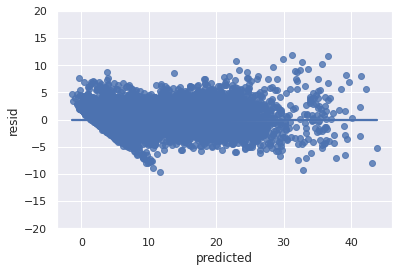

In [ ]:
# Residual and Q plot(predicted power) 
sns.set_theme(color_codes=True)
sns.regplot(x="predicted", y="resid", data=F)
plt.ylim(-20, 20)

(-20.0, 20.0)

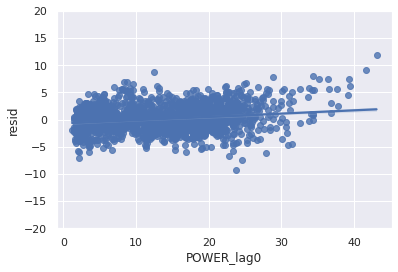

In [ ]:
 # Residual and Q(dataset) plot for weekend 
Weekend= F[(F["Week_Day"]== "SAT")| (F["Week_Day"]== "SUN")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=Weekend)
plt.ylim(-20, 20)

(-20.0, 20.0)

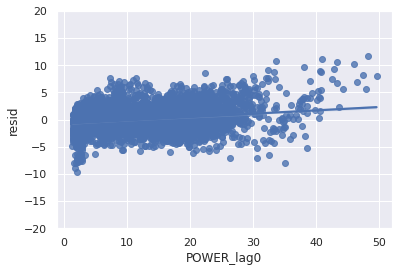

In [ ]:
# Residual and Q(power)plot for weekday
Weekday= F[(F["Week_Day"]== "MON")| (F["Week_Day"]== "TUE")|(F["Week_Day"]== "WED")|(F["Week_Day"]== "THU")|(F["Week_Day"]== "FRI")]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=Weekday)
plt.ylim(-20, 20)


(-20.0, 20.0)

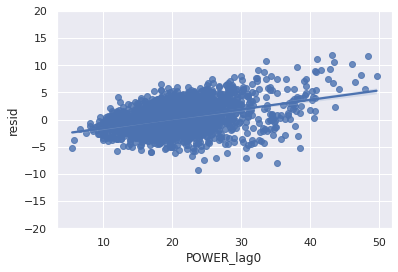

In [ ]:
# Residual and Q plot for months (NOV to March) 
NOVtoMARCH = F[(F["month"]== 1)| (F["month"]== 2)|(F["month"]== 3)|(F["month"]== 11)|(F["month"]== 12)]
sns.set_theme(color_codes=True)
sns.regplot(x="POWER_lag0", y="resid", data=NOVtoMARCH)
plt.ylim(-20, 20)

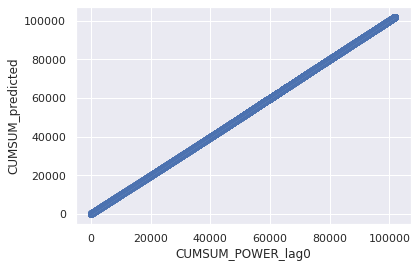

In [ ]:
# Q-Q plot (power) X: cumulative sum of the dataset  Y: Cumulated sum of the predicted
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_POWER_lag0", y="CUMSUM_predicted", data=F)



(0.5, 1.5)

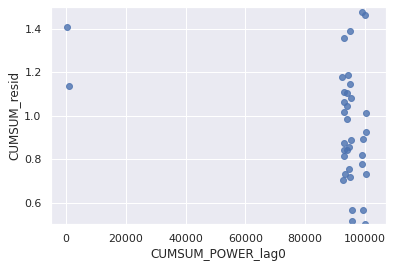

In [ ]:
# Q-Q plot (power) X: cumulative sum of the dataset  Y: cumulative sum of residual 
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_POWER_lag0", y="CUMSUM_resid", data=F)
plt.ylim(0.5, 1.5)

(0.5, 1.5)

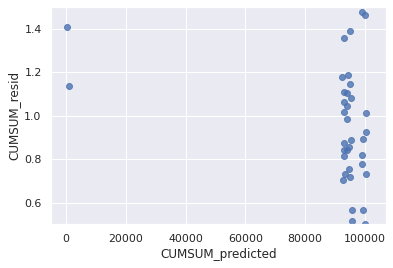

In [ ]:
# Q-Q plot (power) X: cumulative sum of the predicted  Y: cumulative sum of residual 
sns.set_theme(color_codes=True)
sns.regplot(x="CUMSUM_predicted", y="CUMSUM_resid", data=F)
plt.ylim(0.5, 1.5)

In [ ]:
lagged4 = pd.concat([F['resid'].shift(lag).rename('{}_lag{}'.format(F['resid'].name, lag)) for lag in range(13)], axis=1)
# we convert the integers to float using astype fuction  and drop the the nan values usiing dropna function.
L4=lagged4.dropna().astype(float)
L4

,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4,resid_lag5,resid_lag6,resid_lag7,resid_lag8,resid_lag9,resid_lag10,resid_lag11,resid_lag12
36,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,-0.157886,-0.931293,0.013816
37,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,-0.157886,-0.931293
38,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,-0.157886
39,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679
40,0.282788,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529,0.239414,0.784937,1.852420
8756,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529,0.239414,0.784937
8757,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529,0.239414
8758,-3.129640,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529


In [ ]:
result6 = pd.concat([L4,L2], axis=1, join='inner')
result6

,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4,resid_lag5,resid_lag6,resid_lag7,resid_lag8,resid_lag9,...,Temperature_lag15,Temperature_lag16,Temperature_lag17,Temperature_lag18,Temperature_lag19,Temperature_lag20,Temperature_lag21,Temperature_lag22,Temperature_lag23,Temperature_lag24
36,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,...,1.8,2.0,2.1,2.2,2.4,2.3,2.3,2.2,2.0,1.8
37,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,...,1.6,1.8,2.0,2.1,2.2,2.4,2.3,2.3,2.2,2.0
38,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,...,1.7,1.6,1.8,2.0,2.1,2.2,2.4,2.3,2.3,2.2
39,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,...,1.7,1.7,1.6,1.8,2.0,2.1,2.2,2.4,2.3,2.3
40,0.282788,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,...,1.8,1.7,1.7,1.6,1.8,2.0,2.1,2.2,2.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529,...,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9,6.0
8756,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,...,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0,5.9
8757,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,...,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2,6.0
8758,-3.129640,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,...,3.0,3.4,4.0,4.6,5.0,5.4,5.7,6.2,6.2,6.2


In [ ]:
result7 = pd.concat([result6,L3], axis=1, join='inner')
r7=result7.dropna()
r7

,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4,resid_lag5,resid_lag6,resid_lag7,resid_lag8,resid_lag9,...,Irradiation.flux_lag15,Irradiation.flux_lag16,Irradiation.flux_lag17,Irradiation.flux_lag18,Irradiation.flux_lag19,Irradiation.flux_lag20,Irradiation.flux_lag21,Irradiation.flux_lag22,Irradiation.flux_lag23,Irradiation.flux_lag24
36,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,...,1.7,2.2,2.2,2.2,1.9,2.8,5.7,15.7,43.2,40.0
37,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,...,1.6,1.7,2.2,2.2,2.2,1.9,2.8,5.7,15.7,43.2
38,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,-1.584787,...,1.4,1.6,1.7,2.2,2.2,2.2,1.9,2.8,5.7,15.7
39,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,2.163324,...,2.2,1.4,1.6,1.7,2.2,2.2,2.2,1.9,2.8,5.7
40,0.282788,0.815686,-0.953503,-1.109373,1.495166,-0.463999,-0.692482,0.446889,-0.535636,-0.251918,...,3.1,2.2,1.4,1.6,1.7,2.2,2.2,2.2,1.9,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,0.414529,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8,4.6
8756,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,0.920633,...,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2,4.8
8757,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,0.370660,...,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4,5.2
8758,-3.129640,3.108103,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.478183,-1.093089,...,4.8,3.9,3.8,3.9,3.8,3.7,3.4,4.4,3.6,4.4


In [ ]:
import pandas as pd
import statsmodels.api as sm
X1 = r7[['resid_lag1','resid_lag2','resid_lag3','resid_lag4','resid_lag5','resid_lag6','resid_lag7','resid_lag8','resid_lag9','resid_lag10','resid_lag11','resid_lag12']] 
Y1 = r7['resid_lag0']

In [ ]:
# we fit our model using statmodels library 
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

LinearRegression()

In [ ]:
# with statsmodels we display a comprehensive table with statistical informations.
X1 = sm.add_constant(X1) # adding a constant
 
model = sm.OLS(Y1, X1).fit()
predictions = model.predict(X1) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             resid_lag0   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.793
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           8.75e-06
Time:                        11:50:21   Log-Likelihood:                -17934.
No. Observations:                8392   AIC:                         3.589e+04
Df Residuals:                    8379   BIC:                         3.599e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0003      0.022      0.012      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
F1=r7.rename(columns={'Tuesday 0h':'Tuesday_0h','Tuesday 1h':'Tuesday_1h','Tuesday 2h':'Tuesday_2h','Tuesday 3h':'Tuesday_3h','Tuesday 4h':'Tuesday_4h','Tuesday 5h':'Tuesday_5h','Tuesday 6h':'Tuesday_6h','Tuesday 7h':'Tuesday_7h','Tuesday 8h':'Tuesday_8h','Tuesday 9h':'Tuesday_9h','Tuesday 10h':'Tuesday_10h','Tuesday 11h':'Tuesday_11h','Tuesday 12h':'Tuesday_12h','Tuesday 13h':'Tuesday_13h','Tuesday 14h':'Tuesday_14h',
'Tuesday 15h':'Tuesday_15h','Tuesday 16h':'Tuesday_16h','Tuesday 17h':'Tuesday_17h','Tuesday 18h':'Tuesday_18h','Tuesday 19h':'Tuesday_19h','Tuesday 20h':'Tuesday_20h','Tuesday 21h':'Tuesday_21h','Tuesday 22h':'Tuesday_22h','Tuesday 23h':'Tuesday_23h','Wednesday 0h':'Wednesday_0h','Wednesday 1h':'Wednesday_1h','Wednesday 2h':'Wednesday_2h','Wednesday 3h':'Wednesday_3h','Wednesday 4h':'Wednesday_4h','Wednesday 5h':'Wednesday_5h','Wednesday 6h':'Wednesday_6h','Wednesday 7h':'Wednesday_7h','Wednesday 8h':'Wednesday_8h','Wednesday 9h':'Wednesday_9h','Wednesday 10h':'Wednesday_10h','Wednesday 11h':'Wednesday_11h','Wednesday 12h':'Wednesday_12h','Wednesday 13h':'Wednesday_13h','Wednesday 14h':'Wednesday_14h',
'Wednesday 15h':'Wednesday_15h','Wednesday 16h':'Wednesday_16h','Wednesday 17h':'Wednesday_17h','Wednesday 18h':'Wednesday_18h','Wednesday 19h':'Wednesday_19h','Wednesday 20h':'Wednesday_20h','Wednesday 21h':'Wednesday_21h','Wednesday 22h':'Wednesday_22h','Wednesday 23h':'Wednesday_23h','Thursday 0h':'Thursday_0h','Thursday 1h':'Thursday_1h','Thursday 2h':'Thursday_2h','Thursday 3h':'Thursday_3h','Thursday 4h':'Thursday_4h','Thursday 5h':'Thursday_5h','Thursday 6h':'Thursday_6h','Thursday 7h':'Thursday_7h','Thursday 8h':'Thursday_8h','Thursday 9h':'Thursday_9h','Thursday 10h':'Thursday_10h','Thursday 11h':'Thursday_11h','Thursday 12h':'Thursday_12h','Thursday 13h':'Thursday_13h','Thursday 14h':'Thursday_14h',
'Thursday 15h':'Thursday_15h','Thursday 16h':'Thursday_16h','Thursday 17h':'Thursday_17h','Thursday 18h':'Thursday_18h','Thursday 19h':'Thursday_19h','Thursday 20h':'Thursday_20h','Thursday 21h':'Thursday_21h','Thursday 22h':'Thursday_22h','Thursday 23h':'Thursday_23h','Friday 0h':'Friday_0h','Friday 1h':'Friday_1h','Friday 2h':'Friday_2h','Friday 3h':'Friday_3h','Friday 4h':'Friday_4h','Friday 5h':'Friday_5h','Friday 6h':'Friday_6h','Friday 7h':'Friday_7h','Friday 8h':'Friday_8h','Friday 9h':'Friday_9h','Friday 10h':'Friday_10h','Friday 11h':'Friday_11h','Friday 12h':'Friday_12h','Friday 13h':'Friday_13h','Friday 14h':'Friday_14h',
'Friday 15h':'Friday_15h','Friday 16h':'Friday_16h','Friday 17h':'Friday_17h','Friday 18h':'Friday_18h','Friday 19h':'Friday_19h','Friday 20h':'Friday_20h','Friday 21h':'Friday_21h','Friday 22h':'Friday_22h','Friday 23h':'Friday_23h','Saturday 0h':'Saturday_0h','Saturday 1h':'Saturday_1h','Saturday 2h':'Saturday_2h','Saturday 3h':'Saturday_3h','Saturday 4h':'Saturday_4h','Saturday 5h':'Saturday_5h','Saturday 6h':'Saturday_6h','Saturday 7h':'Saturday_7h','Saturday 8h':'Saturday_8h','Saturday 9h':'Saturday_9h','Saturday 10h':'Saturday_10h','Saturday 11h':'Saturday_11h','Saturday 12h':'Saturday_12h','Saturday 13h':'Saturday_13h','Saturday 14h':'Saturday_14h',
'Saturday 15h':'Saturday_15h','Saturday 16h':'Saturday_16h','Saturday 17h':'Saturday_17h','Saturday 18h':'Saturday_18h','Saturday 19h':'Saturday_19h','Saturday 20h':'Saturday_20h','Saturday 21h':'Saturday_21h','Saturday 22h':'Saturday_22h','Saturday 23h':'Saturday_23h','Sunday 0h':'Sunday_0h','Sunday 1h':'Sunday_1h','Sunday 2h':'Sunday_2h','Sunday 3h':'Sunday_3h','Sunday 4h':'Sunday_4h','Sunday 5h':'Sunday_5h','Sunday 6h':'Sunday_6h','Sunday 7h':'Sunday_7h','Sunday 8h':'Sunday_8h','Sunday 9h':'Sunday_9h','Sunday 10h':'Sunday_10h','Sunday 11h':'Sunday_11h','Sunday 12h':'Sunday_12h','Sunday 13h':'Sunday_13h','Sunday 14h':'Sunday_14h',
'Sunday 15h':'Sunday_15h','Sunday 16h':'Sunday_16h','Sunday 17h':'Sunday_17h','Sunday 18h':'Sunday_18h','Sunday 19h':'Sunday_19h','Sunday 20h':'Sunday_20h','Sunday 21h':'Sunday_21h','Sunday 22h':'Sunday_22h','Sunday 23h':'Sunday_23h','Monday 0h':'Monday_0h','Monday 1h':'Monday_1h','Monday 2h':'Monday_2h','Monday 3h':'Monday_3h','Monday 4h':'Monday_4h','Monday 5h':'Monday_5h','Monday 6h':'Monday_6h','Monday 7h':'Monday_7h','Monday 8h':'Monday_8h','Monday 9h':'Monday_9h','Monday 10h':'Monday_10h','Monday 11h':'Monday_11h','Monday 12h':'Monday_12h','Monday 13h':'Monday_13h','Monday 14h':'Monday_14h',
'Monday 15h':'Monday_15h','Monday 16h':'Monday_16h','Monday 17h':'Monday_17h','Monday 18h':'Monday_18h','Monday 19h':'Monday_19h','Monday 20h':'Monday_20h','Monday 21h':'Monday_21h','Monday 22h':'Monday_22h','Monday 23h':'Monday_23h','Irradiation.flux_lag0':'Irradiation_flux_lag0','Irradiation.flux_lag1':'Irradiation_flux_lag1','Irradiation.flux_lag2':'Irradiation_flux_lag2','Irradiation.flux_lag3':'Irradiation_flux_lag3','Irradiation.flux_lag4':'Irradiation_flux_lag4','Irradiation.flux_lag5':'Irradiation_flux_lag5','Irradiation.flux_lag6':'Irradiation_flux_lag6','Irradiation.flux_lag7':'Irradiation_flux_lag7','Irradiation.flux_lag8':'Irradiation_flux_lag8','Irradiation.flux_lag9':'Irradiation_flux_lag9','Irradiation.flux_lag10':'Irradiation_flux_lag10',
'Irradiation.flux_lag11':'Irradiation_flux_lag11','Irradiation.flux_lag12':'Irradiation_flux_lag12','Irradiation.flux_lag13':'Irradiation_flux_lag13','Irradiation.flux_lag14':'Irradiation_flux_lag14','Irradiation.flux_lag15':'Irradiation_flux_lag15','Irradiation.flux_lag16':'Irradiation_flux_lag16','Irradiation.flux_lag17':'Irradiation_flux_lag17','Irradiation.flux_lag18':'Irradiation_flux_lag18','Irradiation.flux_lag19':'Irradiation_flux_lag19','Irradiation.flux_lag20':'Irradiation_flux_lag20','Irradiation.flux_lag21':'Irradiation_flux_lag21','Irradiation.flux_lag22':'Irradiation_flux_lag22','Irradiation.flux_lag23':'Irradiation_flux_lag23','Irradiation.flux_lag24':'Irradiation_flux_lag24','Bank Holidays':'Bank_Holidays'})

KJB = smf.ols('resid_lag0 ~ Temperature_lag0 + Temperature_lag1 + Temperature_lag2 + Temperature_lag3 + Temperature_lag4 + Temperature_lag5 + Temperature_lag6 + Temperature_lag7 + Temperature_lag8 + Temperature_lag9 + Temperature_lag10 + Temperature_lag11 + Temperature_lag12 + Temperature_lag13 + Temperature_lag14 + Temperature_lag15 + Temperature_lag16 + Temperature_lag17 + Temperature_lag18 + Temperature_lag19 + Temperature_lag20 + Temperature_lag21 + Temperature_lag22 + Temperature_lag23 + Temperature_lag24 + Irradiation_flux_lag0 + Irradiation_flux_lag1 + Irradiation_flux_lag2 + Irradiation_flux_lag3 + Irradiation_flux_lag4 + Irradiation_flux_lag5 + Irradiation_flux_lag6 + Irradiation_flux_lag7 + Irradiation_flux_lag8 + Irradiation_flux_lag9 + Irradiation_flux_lag10 + Irradiation_flux_lag11 + Irradiation_flux_lag12 + Irradiation_flux_lag13 + Irradiation_flux_lag14 + Irradiation_flux_lag15 + Irradiation_flux_lag16 + Irradiation_flux_lag17 + Irradiation_flux_lag18 + Irradiation_flux_lag19 + Irradiation_flux_lag20 + Irradiation_flux_lag21 + Irradiation_flux_lag22 + Irradiation_flux_lag23 + Irradiation_flux_lag24 + resid_lag1 + resid_lag2 + resid_lag3 + resid_lag4',F1).fit()
F1['predicted'] = KJB.fittedvalues
F1['resid'] = KJB.resid
F1['predicted'] = KJB.predict(F1)
F1.loc[:,'predicted'] =  KJB.predict(F1)
F1

In [ ]:
# We add one column with cumulative sum oF1 the predicted value (our model )and another column F1or the dataset . 
F1['CUMSUM_predicted'] = F1['predicted'].cumsum()
F1['CUMSUM_resid_lag0'] = F1['resid_lag0'].cumsum()
# We add another column with cumlative sum F1or the residual value 
F1['CUMSUM_resid'] = F1['resid'].cumsum()
F1

,resid_lag0,resid_lag1,resid_lag2,resid_lag3,resid_lag4,Temperature_lag0,Temperature_lag1,Temperature_lag2,Temperature_lag3,Temperature_lag4,...,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,predicted,resid,CUMSUM_predicted,CUMSUM_resid_lag0,CUMSUM_resid
28,-0.417773,-0.336679,-0.157886,-0.931293,0.013816,0.8,1.2,1.8,1.8,1.7,...,4.7,4.4,4.7,5.1,4.9,0.006615,-0.424388,0.006615,-0.417773,-4.243880e-01
29,-1.584787,-0.417773,-0.336679,-0.157886,-0.931293,0.6,0.8,1.2,1.8,1.8,...,8.8,4.7,4.4,4.7,5.1,0.009212,-1.594000,0.015828,-2.002560,-2.018388e+00
30,2.163324,-1.584787,-0.417773,-0.336679,-0.157886,0.3,0.6,0.8,1.2,1.8,...,22.7,8.8,4.7,4.4,4.7,0.007503,2.155821,0.023330,0.160764,1.374337e-01
31,-0.251918,2.163324,-1.584787,-0.417773,-0.336679,0.3,0.3,0.6,0.8,1.2,...,28.4,22.7,8.8,4.7,4.4,0.006376,-0.258294,0.029706,-0.091154,-1.208599e-01
32,-0.535636,-0.251918,2.163324,-1.584787,-0.417773,0.3,0.3,0.3,0.6,0.8,...,40.0,28.4,22.7,8.8,4.7,0.005907,-0.541543,0.035613,-0.626790,-6.624028e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.035655,-0.496302,3.103155,2.098361,-1.520308,0.5,0.6,0.7,0.6,0.5,...,3.6,4.4,5.2,4.8,4.6,-0.011357,-1.024298,1.430191,-0.368372,-1.798563e+00
8756,-1.342839,-1.035655,-0.496302,3.103155,2.098361,-0.7,0.5,0.6,0.7,0.6,...,4.4,3.6,4.4,5.2,4.8,-0.026878,-1.315961,1.403313,-1.711211,-3.114525e+00
8757,3.108103,-1.342839,-1.035655,-0.496302,3.103155,-1.3,-0.7,0.5,0.6,0.7,...,3.4,4.4,3.6,4.4,5.2,-0.010513,3.118616,1.392800,1.396891,4.091560e-03
8758,-3.129640,3.108103,-1.342839,-1.035655,-0.496302,-1.7,-1.3,-0.7,0.5,0.6,...,3.7,3.4,4.4,3.6,4.4,0.009189,-3.138829,1.401989,-1.732749,-3.134737e+00


In [ ]:
#We evaluate the regression model using the mean absolute error metric 
#We import the mean_absolute_error from the module sklearn.metrics of sklearn library.
from sklearn.metrics import mean_absolute_error as mae
# we calculate  mean absolute error (MAE) 
error = mae(F1['resid_lag0'], F1['predicted'])
# We print the value 
print("Mean absolute error : " + str(error))

Mean absolute error : 1.5257923478130913
